## Breast Cancer Detection

#### Classification of Breast Cancer Cell as melignant(4) or benign(2)

In [1]:
import numpy as np
import matplotlib
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

In [2]:
print("numpy - {}".format(np.version.version))
print("pandas - {}".format(pd.__version__))
print('matplotlib - {}'.format(matplotlib.__version__))
print('sklearn - {}'.format(sklearn.__version__))

numpy - 1.16.5
pandas - 0.25.1
matplotlib - 3.1.1
sklearn - 0.21.3


In [299]:
# Load Dataset of breast cancer from UCI ML Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv(url, names=names)
# This dataset has missing values in bare_nuclei column
df

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [300]:
#preprocessing the data
#replacing the missing values in bare_nuclei column by mean
bn_array = np.array(df[df["bare_nuclei"]!='?']["bare_nuclei"])
bn_array=[int(x) for x in bn_array]
bn_array = np.array(bn_array)
meanval = bn_array.mean()
df["bare_nuclei"].replace('?',str(meanval), inplace=True)
df['bare_nuclei'] = pd.to_numeric(df['bare_nuclei'])
print(df.axes)
print(df.shape)

#dropping the id column because it will be of no use in training ML model
df.drop(['id'], 1, inplace = True)
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
(699, 11)
(699, 10)


In [301]:
print(df.iloc[698])

#Knowing more about each feature of data
print(df.describe())

clump_thickness            4.0
uniform_cell_size          8.0
uniform_cell_shape         8.0
marginal_adhesion          5.0
single_epithelial_size     4.0
bare_nuclei                5.0
bland_chromatin           10.0
normal_nucleoli            4.0
mitoses                    1.0
class                      4.0
Name: 698, dtype: float64
       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bare_nuclei  \
count        

In [302]:
#I have observed that min of every feature is 1 and maximum is 10. Also mean is very less for all features
#mean of class is less than 3 it means we have more benign cases than malignant

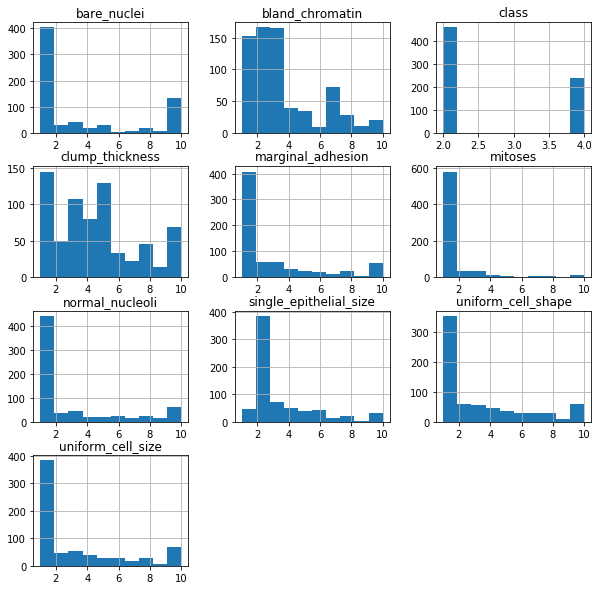

<Figure size 432x288 with 0 Axes>

In [303]:
#plotting histograms for each variable to know more about features
df.hist(figsize=(10, 10))
plt.show()
plt.savefig('foo.pdf')

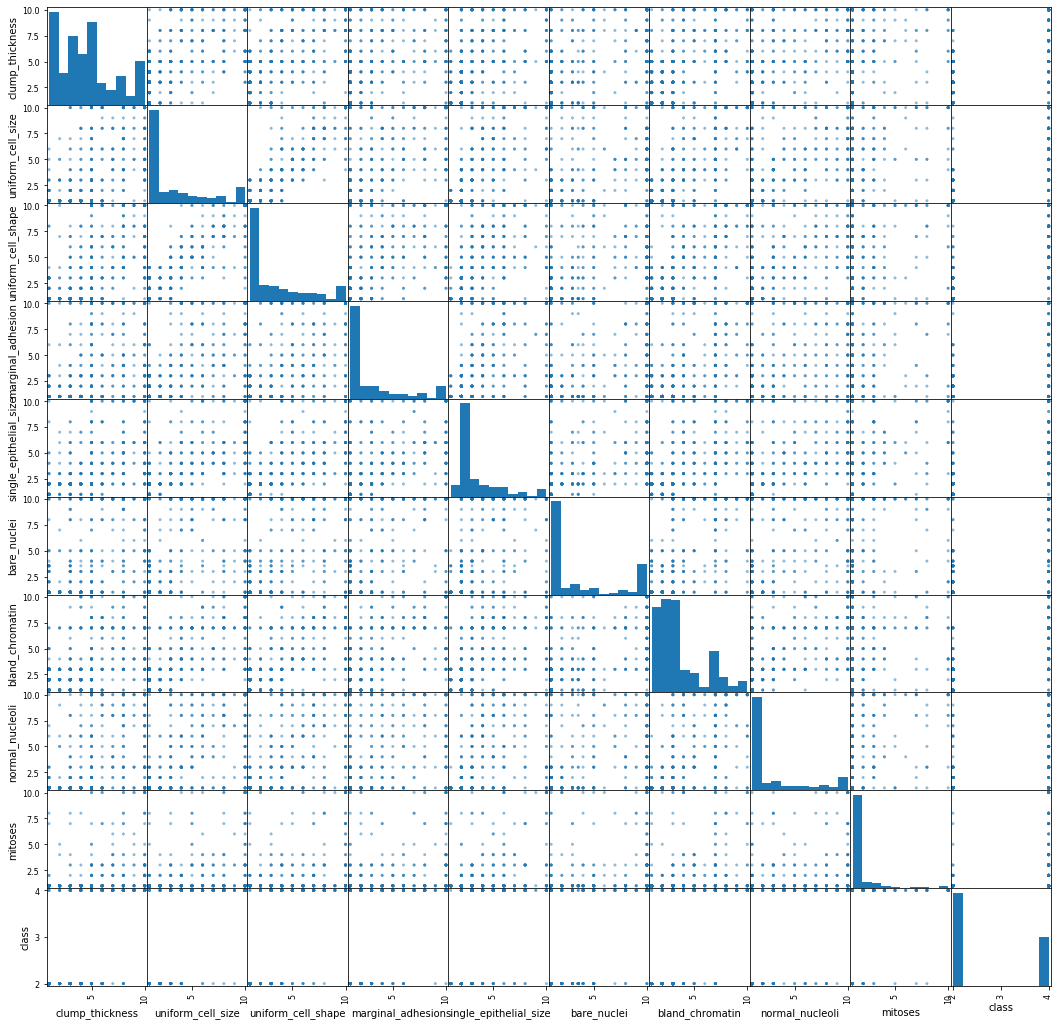

In [304]:
#creating scatter plot matrix to find if there exist any linear relation between features
scatter_matrix(df, figsize=(18, 18))
plt.show()

In [305]:
df.corr()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.587300,0.558428,0.535835,0.350034,0.716001
uniform_cell_size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686801,0.755721,0.722865,0.458693,0.817904
uniform_cell_shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.709606,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.665049,0.666715,0.603352,0.417633,0.696800
single_epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.581261,0.616102,0.628881,0.479101,0.682785
bare_nuclei,0.587300,0.686801,0.709606,0.665049,0.581261,1.000000,0.675896,0.577362,0.338740,0.816050
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.675896,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.577362,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.338740,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.816050,0.756616,0.712244,0.423170,1.000000


In [306]:
df.drop(['uniform_cell_size'], 1, inplace = True)

In [307]:
# from above scatter plot I have observed that there does not exist any strong linear relation between features moreover I can
# observe from last row of figure that malignant cell takes almost every value of all parameters therfore we can not decide 
# straightforward whether a cell is malignant or benign

In [308]:
#create X and Y dataset for training
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

In [309]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [310]:
X

array([[ 0.20693572, -0.74329904, -0.63324716, ..., -0.17966213,
        -0.61182504, -0.34391178],
       [ 0.20693572,  0.2668747 ,  0.76862067, ..., -0.17966213,
        -0.28411186, -0.34391178],
       [-0.50386559, -0.74329904, -0.63324716, ..., -0.17966213,
        -0.61182504, -0.34391178],
       ...,
       [ 0.20693572,  2.28722218,  0.06768675, ...,  1.87236122,
         2.33759359,  0.23956962],
       [-0.14846494,  0.94032386,  0.41815371, ...,  2.69317056,
         1.02674087, -0.34391178],
       [-0.14846494,  1.61377302,  0.76862067, ...,  2.69317056,
         0.37131451, -0.34391178]])

In [311]:
def infer_cluster_label(labels, actual_labels):
    '''
    Associates most probable label with each cluster in Kmeans model
    returns: dictionary of clusters assigned to each label
    
    '''
    inferred_labels = {}
    for i in range(2):
        #find the index of points in cluster
        labls=[]
        index = np.where(labels==i)
        #append actual label for each point in cluster
        labls.append(actual_labels[index])
        #determine most common label
        counts = np.bincount(np.squeeze(labls).astype(np.uint8))
        #assign the cluster to a value in the inferred label dictionary
        if np.argmax(counts) in inferred_labels:
            #append the new number to the existing array at this key
            inferred_labels[np.argmax(counts)].append(i)
        else:
            inferred_labels[np.argmax(counts)] = [i]
        print(labls)
        print('Cluster: {}, label:{}'.format(i, np.argmax(counts)))
    return inferred_labels

In [312]:
def infer_data_labels(X_labels, cluster_labels):
    '''
    Determines label for each array, depending on the cluster it has been assigned to
    returns: predicted labels for each array
    '''
    #empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, val in cluster_labels.items():
            if cluster in val:
                predicted_labels[i]=key;
                
    return predicted_labels
    

In [313]:
from sklearn.cluster import KMeans

In [314]:
# Internal cluster validation

In [315]:
#Elbow method

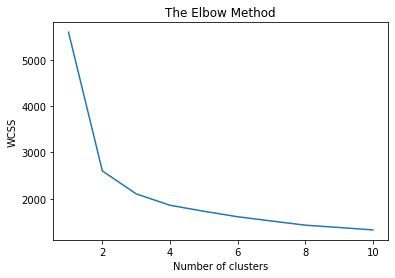

In [316]:
WCSS=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter=3000, n_init=10)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [317]:
#From above it is clear that optimum number of clusters is 2 but we will also compute results for other N values

In [318]:
#silhouette score
from sklearn.metrics import silhouette_score

In [319]:
sili = []
for i in range(2, 8):
    kmeansk = KMeans(n_clusters = i, init='k-means++', max_iter=3000, n_init=10)
    labelsk = kmeansk.fit_predict(X)
    print("WCSS for n = {} is {}".format(i, kmeansk.inertia_))
    print("silhouette for n = {} is {}".format(i, silhouette_score(X, labelsk)))
    sili.append(silhouette_score(X, labelsk))
    print("\n")

WCSS for n = 2 is 2600.3921283290574
silhouette for n = 2 is 0.5609962922959725


WCSS for n = 3 is 2106.4598385324434
silhouette for n = 3 is 0.5534589118351128


WCSS for n = 4 is 1860.3570849979383
silhouette for n = 4 is 0.5039371122482188


WCSS for n = 5 is 1731.9323985436263
silhouette for n = 5 is 0.5025493453031333


WCSS for n = 6 is 1614.9009582928288
silhouette for n = 6 is 0.2522278224041018


WCSS for n = 7 is 1510.6469271664164
silhouette for n = 7 is 0.25688257497094863




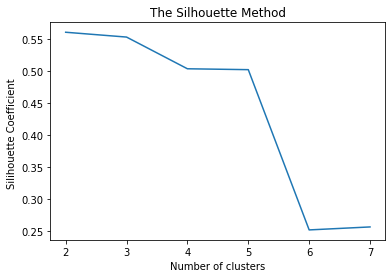

In [343]:
plt.plot(range(2, 8), sili)
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silihouette Coefficient ')
plt.show()

In [321]:
# From above silihouette score optimum numbers of cluster is 2

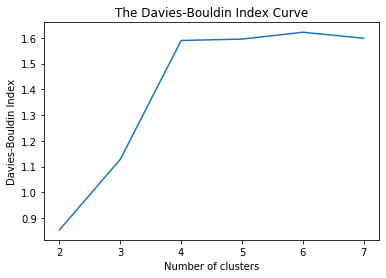

In [344]:
from sklearn.cluster import KMeans 
from sklearn.metrics import davies_bouldin_score 
DBindex=[]
for i in range(2, 8):
    kmeansk = KMeans(n_clusters = i, init='k-means++', max_iter=3000, n_init=10)
    labelsk = kmeansk.fit_predict(X)     
    print("DB index for n = {} is {}".format(i, davies_bouldin_score(X, labelsk)))
    DBindex.append(davies_bouldin_score(X, labelsk))
    print("\n")
plt.plot(range(2, 8), DBindex)
plt.title('The Davies-Bouldin Index Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Index')
plt.show()

In [279]:
#from above The Davies–Bouldin index (DBI) matric we got optimum number of clusters as 2

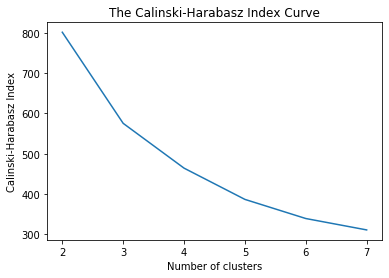

In [345]:
from sklearn import metrics
from sklearn.cluster import KMeans 
CHindex=[]
for i in range(2, 8):
    kmeansk = KMeans(n_clusters = i, init='k-means++', max_iter=3000, n_init=10)
    labelsk = kmeansk.fit_predict(X)     
    print("CH index for n = {} is {}".format(i, metrics.calinski_harabasz_score(X, labelsk)))
    CHindex.append(metrics.calinski_harabasz_score(X, labelsk))
    print("\n")
plt.plot(range(2, 8), CHindex)
plt.title('The Calinski-Harabasz Index Curve')
plt.ylabel('Calinski-Harabasz Index')
plt.xlabel('Number of clusters')
plt.show()

In [324]:
#from the above Calinski-Harabasz index (CHI) matric we got optimum number of clusters as 2 

In [325]:
# As we have labelled data for 2 class we can use 

In [326]:
# External cluster validation

In [327]:
kmeans2 = KMeans(n_clusters = 2, init='k-means++', max_iter=3000, n_init=10)
labelsK2 = kmeans2.fit_predict(X)

In [328]:
labelsK2

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,

In [341]:
#test the infer_cluster_labels() and infer_data_labels() function
kmeans2_cluster_labels = infer_cluster_label(labelsK2, y)
kmeans2_predicted_labels = infer_data_labels(labelsK2, kmeans2_cluster_labels)

In [342]:
#specifing testing options
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
scoring = 'accuracy'
print("accuracy ")
print(accuracy_score(y, kmeans2_predicted_labels))
print(classification_report(y, kmeans2_predicted_labels))

accuracy 
0.9642346208869814
              precision    recall  f1-score   support

           2       0.97      0.97      0.97       458
           4       0.95      0.95      0.95       241

    accuracy                           0.96       699
   macro avg       0.96      0.96      0.96       699
weighted avg       0.96      0.96      0.96       699



In [331]:
# Adjusted Rand index

In [332]:
from sklearn import metrics
metrics.adjusted_rand_score(y, labelsK2)

0.860620941314958

In [333]:
# from above we can see our adjusted Rand index score is good (Perfect labeling is scored 1.0)

In [334]:
metrics.normalized_mutual_info_score(y, labelsK2, average_method='arithmetic')

0.7636527875368617

In [335]:
# from above we can see our Normalized Mutual Information (NMI) score is good (Perfect labeling is scored 1.0)

In [336]:
from sklearn import metrics
print(metrics.homogeneity_score(y, labelsK2))
print(metrics.completeness_score(y, labelsK2))
print(metrics.v_measure_score(y, labelsK2))

0.7641945853723171
0.7631117574035869
0.7636527875368617


In [337]:
# from above we can see our Homogeneity score, completeness score and V-measure score are good (Perfect labeling is scored 1.0)

In [338]:
metrics.fowlkes_mallows_score(y, labelsK2)

0.9368751428351904

In [339]:
# from above The Fowlkes-Mallows index is good 
# The Fowlkes-Mallows score FMI is defined as the geometric mean of the pairwise precision and recall
# A high value indicates a good score (maximum value is 1)

In [340]:
from sklearn.metrics.cluster import contingency_matrix
contingency_matrix(y, labelsK2)

array([[ 13, 445],
       [229,  12]])

In [130]:
# From above we can conclude there are 458 samples whose true cluster is 2 Of them, 13 are in predicted cluster 0 and 445 are in
# predicted cluster 1

# we can also conclude that there are 241 samples whose true cluster is 4 Of them, 229 are in predicted cluster 0 and 12 are in
# predicted cluster 1